# Reduced Order Modeling (ROM) with Proper Orthogonal Decomposition (POD)
This notebook demonstrates how to reduce a 2D heat diffusion PDE into a simpler model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

#Define Simulation Parameters

We’ll use the finite difference method (FDM) to solve the heat equation on a grid.

In [2]:
# Grid setup
nx, ny = 30, 30   # grid size
nt = 200          # number of time steps
dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)
dt = 0.001
alpha = 0.01      # thermal diffusivity

# Initialize temperature field
u = np.zeros((nx, ny))
u[nx//2, ny//2] = 100.0   # hot spot in the center

# Store snapshots for ROM
snapshots = []


#To Simulate

In [3]:
for n in range(nt):
    un = u.copy()
    # FDM update (2D diffusion)
    u[1:-1,1:-1] = (
        un[1:-1,1:-1] +
        alpha*dt/dx**2 * (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1]) +
        alpha*dt/dy**2 * (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2])
    )
    snapshots.append(u.flatten())

snapshots = np.array(snapshots).T  # shape: (space_points, time_steps)
print("Snapshot matrix shape:", snapshots.shape)

Snapshot matrix shape: (900, 200)


# Reduced Order Modeling (POD)

Now, we compress the simulation using Singular Value Decomposition (SVD).

In [4]:
# Apply SVD
U, S, VT = svd(snapshots, full_matrices=False)

# Keep only r modes
r = 5
Ur = U[:, :r]
Sr = S[:r]
Vr = VT[:r, :]

# Approximate reconstruction
snapshots_approx = Ur @ np.diag(Sr) @ Vr
print("Reconstructed shape:", snapshots_approx.shape)

Reconstructed shape: (900, 200)


# Visualize Original vs Reduced

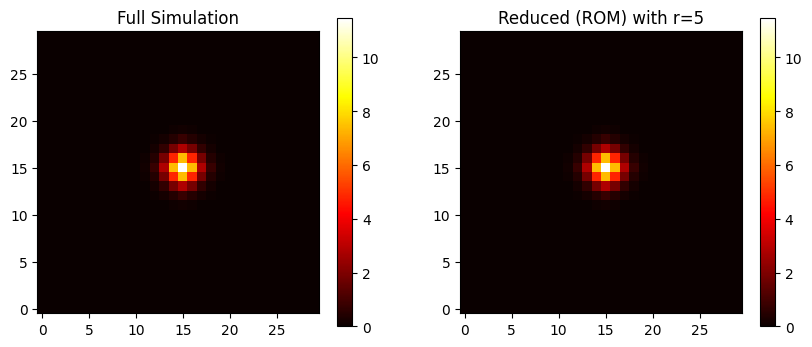

In [5]:
# Pick a time step to compare
timestep = 100
full_field = snapshots[:, timestep].reshape(nx, ny)
reduced_field = snapshots_approx[:, timestep].reshape(nx, ny)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(full_field, cmap="hot", origin="lower")
plt.title("Full Simulation")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(reduced_field, cmap="hot", origin="lower")
plt.title("Reduced (ROM) with r=5")
plt.colorbar()

plt.show()